1. Collecte des données

In [33]:
import pandas as pd
# 2. Collecte des données
# On précise que le séparateur est un point-virgule avec sep=';'
df = pd.read_csv('animes.csv', sep=';' , skiprows=1)
# On vérifie que la lecture a fonctionné en affichant le début du tableau
df.head(62)

,,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,SPY×FAMILY,Comedy / Slice of Life,Manga,37,En cours,Wit / CloverWorks,2022-04-09,8.4,9.1,Ep 2: Secure a Wife,L'introduction de Yor. Mélange parfait d'actio...,7.8,Ep 17: Carry Out the Griffon Plan,"Episode plus léger 'Slice of Life', moins d'en...",La dynamique familiale Forger est le coeur de ...,Anya est une icône de la culture anime moderne.,NaN
57,Dan Da Dan,Action / Supernatural,Manga,12,En cours,Science SARU,2024-10-04,8.4,9.7,Ep 7: Acrobatic Silky,Une histoire tragique et émouvante derrière le...,7.9,Ep 12: Let's Go to the Cursed House,Fin de saison un peu abrupte pour certains.,Animation déjantée et créative typique de Scie...,"Mélange unique d'occulte, d'aliens et de roman...",NaN
58,Made in Abyss,Adventure / Mystery,Manga,25,En cours,Kinema Citrus,2017-07-07,8.6,9.6,Ep 13: The Challengers,Un épisode final d'une beauté et d'une cruauté...,7.5,Ep 6: Incinerator,"Episode d'entraînement, nécessaire mais moins ...",Contraste brutal entre le design 'Chibi' et l'...,Un voyage sans retour vers les profondeurs tra...,NaN
59,Kuroko's Basket,Sport / Basketball,Manga,75,Fini,Production I.G,2012-04-07,8.1,9.0,Ep 24: Don't Get the Wrong Idea,Kise vs Aomine. Le duel de la Génération des M...,7.3,Ep 5: Your Basketball,"Mise en place de l'équipe, rythme plus lent.",Basket avec des super-pouvoirs assumés ('The Z...,Animation fluide et intensité des matchs incom...,NaN


1.1 Mini audit

In [34]:
# 1. On cherche les valeurs manquante
print("Valeurs manquantes par colonne :")
print(df.isna().sum())

# 2. On cherche les lignes doublons
print("\nNombre de doublons :", df.duplicated().sum())

# 3. On vérifie le "format" de chaque colonne
print("\nTypes de colonnes :")
print(df.dtypes)

Valeurs manquantes par colonne :
                      0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64

Nombre de doublons : 2

Types de colonnes :
                      object
Genre_Tags            object
Source                object
Nb_Episodes            int64
Status                object
Studio                object
Date_Pub              object
Note_Globale         float64
Note_Meilleur_Ep     float64
Meilleur_Ep_Titre     object
Comm_Meilleur_Ep      object
Note_Pire_Ep         float64
Pire_Ep_Titre         object
Comm_Pire_Ep          object
Comm_Saison_1         object
Comm_Saison_2         object
Comm_Saison_3         object
dtype: o

2. Nettoyage de données

In [49]:
# 1. On crée une copie pour travailler sans abîmer le tableau original
df_clean = df.copy()

# 2. Supprimer les lignes avec des valeurs manquantes
# On se concentre sur les animés qui ont toutes leurs infos
df_clean = df_clean.dropna()

# 3. Supprimer les 14 doublons pour ne pas compter deux fois le même animé
df_clean = df_clean.drop_duplicates()

# On affiche le résultat pour vérifier
display(df_clean)
df_clean.to_csv('animes_nettoye.csv', index=False)

,,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.
5,Sword Art Online,Isekai / Romance,Light Novel,25,Fini,A-1 Pictures,2012-07-08,7.2,8.9,Ep 9: Le démon aux yeux bleus,"Hype absolue, révélation du Dual Wield.",5.9,Ep 22: La grande quête (Alfheim),Rythme lent et enjeux faibles dans l'arc des f...,"Concept 'Jeu de la mort' accrocheur, romance f...","Chute de qualité, méchant caricatural et moins...",Retour en force avec Gun Gale Online et ton pl...
6,Re:Zero,Isekai / Psychologique,Light Novel,50,Fini,White Fox,2016-04-04,8.2,9.8,Ep 15: L'extérieur de la folie,"Chef d'oeuvre d'horreur et de désespoir, fin l...",7.6,Ep 13: Le chevalier autoproclamé,"Episode gênant (cringe) voulu par le scénario,...",Boucle temporelle et basculement vers le thril...,Arc Sanctuaire dense en dialogues et passé des...,"Résolution intelligente, Subaru grandit et uti..."
7,Dr. Stone,Sci-Fi / Adventure,Manga,57,En cours,TMS Entertainment,2019-07-05,8.3,9.1,Ep 24: Les voix vers l'infini,"Conclusion S1 émouvante, lien passé-futur subl...",7.1,Ep 14: Master of Flame,"Rythme un peu plus lent, préparation de tournoi.","Le réveil dans un monde de pierre, la science ...",Stone Wars : Conflit idéologique et batailles ...,New World : Exploration maritime et découverte...
8,One Piece,Adventure / Shonen,Manga,1090,En cours,Toei Animation,1999-10-20,8.7,9.8,Ep 1015: Chapeau de Paille Luffy,"Réalisation cinéma époustouflante, sommet de W...",5.6,Ep 336: Chopperman (Filler),Episode hors-série enfantin totalement dispens...,"Saga East Blue : La formation de l'équipage, n...",Saga Alabasta : Premier grand défi géopolitiqu...,Saga Skypiea/Water 7 : Aventure céleste puis d...
9,Blue Lock,Sport / Thriller,Manga,36,En cours,8bit,2022-10-09,8.2,9.3,Ep 11: La dernière pièce,"Le puzzle s'assemble, le but d'Isagi est jouis...",6.0,Ep 22: Voice (S2),"Qualité d'animation en baisse critique, beauco...","Concept Battle Royale de foot, égoïsme pur mis...","Sélection U-20, enjeux d'équipe vs individualité.

3. Enrichir les données

In [44]:
# On donne un nom propre à la première colonne qui était vide
# Cela permet d'appeler 'Titre' dans notre code
df_clean = df_clean.rename(columns={' ': 'Titre'})

# 1. Calcul de la Performance (Note de l'animé vs Moyenne du catalogue)
# On calcule la moyenne de toutes les notes
moyenne_catalogue = df_clean['Note_Globale'].mean()

# On crée une colonne qui montre l'écart avec cette moyenne
# Un score positif signifie que l'animé est au-dessus de la moyenne
df_clean['Performance_vs_Moyenne'] = df_clean['Note_Globale'] - moyenne_catalogue

# 2. Calcul de la Stabilité (Écart entre le meilleur épisode et la note globale)
# Un petit écart signifie que l'animé est régulier dans son excellence
df_clean['Ecart_Stabilite'] = df_clean['Note_Meilleur_Ep'] - df_clean['Note_Globale']

# 3. Création du Verdict (Classification selon la note globale)
# On définit des catégories simples pour aider à la lecture
def categoriser(note):
    if note >= 9:
        return "Excellent"
    elif note >= 8:
        return "Très Bon"
    elif note >= 7:
        return "Correct"
    else:
        return "Moyen / À revoir"

# On applique cette règle à la colonne 'Note_Globale'
df_clean['Verdict_Qualite'] = df_clean['Note_Globale'].apply(categoriser)

# 4. Affichage final pour vérifier nos nouveaux calculs
display(df_clean[['Titre', 'Note_Globale', 'Performance_vs_Moyenne', 'Ecart_Stabilite', 'Verdict_Qualite']].head(10))

,Titre,Note_Globale,Performance_vs_Moyenne,Ecart_Stabilite,Verdict_Qualite
0,Naruto,8.4,0.069388,1.2,Très Bon
1,Trigun,8.2,-0.130612,0.9,Très Bon
2,Dragon Ball Z,8.7,0.369388,0.7,Très Bon
3,Fullmetal Alchemist: Brotherhood,9.1,0.769388,0.5,Excellent
4,Cowboy Bebop,8.8,0.469388,0.9,Très Bon
5,Sword Art Online,7.2,-1.130612,1.7,Correct
6,Re:Zero,8.2,-0.130612,1.6,Très Bon
7,Dr. Stone,8.3,-0.030612,0.8,Très Bon
8,One Piece,8.7,0.369388,1.1,Très Bon
9,Blue Lock,8.2,-0.130612,1.1,Très Bon


4. Analyse de données

In [37]:
# Résumé mathématique des nouveaux indicateurs
# On regarde la moyenne, le minimum et le maximum de la performance et de la stabilité
résumé_stats = df_clean[['Performance_vs_Moyenne', 'Ecart_Stabilite']].describe()

# Comptage des verdicts
# On veut savoir combien d'animés tombent dans chaque catégorie de qualité
répartition_qualité = df_clean['Verdict_Qualite'].value_counts()

print("Résumé statistique de la performance et de la stabilité :")
display(résumé_stats)

print("Nombre d'animés par catégorie de qualité :")
print(répartition_qualité)

Nombre d'animés par catégorie de qualité :
Verdict_Qualite
Très Bon            36
Correct              8
Excellent            4
Moyen / À revoir     1
Name: count, dtype: int64


4.1 Corrélation

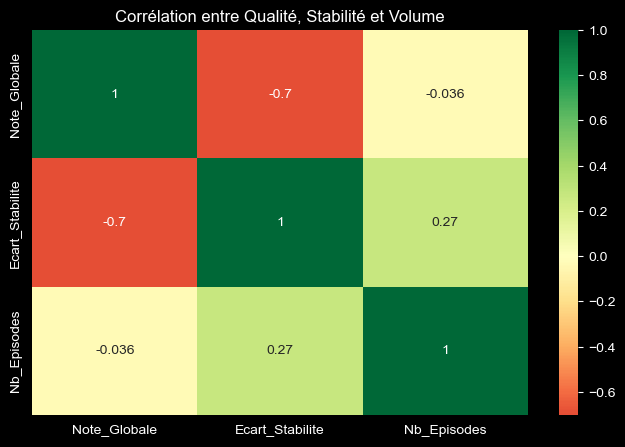

In [38]:
# On importe les outils nécessaires pour cette cellule
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. On sélectionne nos colonnes de qualité
colonnes_qualité = df_clean[['Note_Globale', 'Ecart_Stabilite', 'Nb_Episodes']]

# 2. On calcule la matrice de corrélation
matrice_corr = colonnes_qualité.corr()

# 3. On affiche le visuel
plt.figure(figsize=(8, 5))
sns.heatmap(matrice_corr, annot=True, cmap='RdYlGn', center=0)
plt.title("Corrélation entre Qualité, Stabilité et Volume")

# 4. On force l'affichage
plt.show()

5. Analyse par genre

In [43]:
# On regroupe les données par la colonne 'Genre_Tags'
# On utilise .agg() pour calculer plusieurs statistiques d'un seul coup
analyse_genre = df_clean.groupby('Genre_Tags').agg(
    Note_Moyenne=('Note_Globale', 'mean'),            # Qualité moyenne
    Performance_Moyenne=('Performance_vs_Moyenne', 'mean'), # Écart à la moyenne
    Stabilite_Moyenne=('Ecart_Stabilite', 'mean'),      # Régularité
    Nombre_Animes=('Titre', 'count')                   # Quantité par genre
).sort_values(by='Note_Moyenne', ascending=False)      # On classe du meilleur au moins bon

# Affichage du tableau de bord complet
# Ce tableau est ta "preuve chiffrée" pour ton oral
print("Tableau récapitulatif de la performance par Genre :")
display(analyse_genre.head())

,Note_Moyenne,Performance_Moyenne,Stabilite_Moyenne,Nombre_Animes
Genre_Tags,,,,
Adventure / Fantasy,9.30,0.969388,0.1,1
Sci-Fi / Thriller,9.10,0.769388,0.6,1
Aventure / Military,9.10,0.769388,0.5,1
Thriller / Mystery,8.90,0.569388,0.2,1
Adventure / Shonen,8.85,0.519388,0.9,2


6. Visualisation

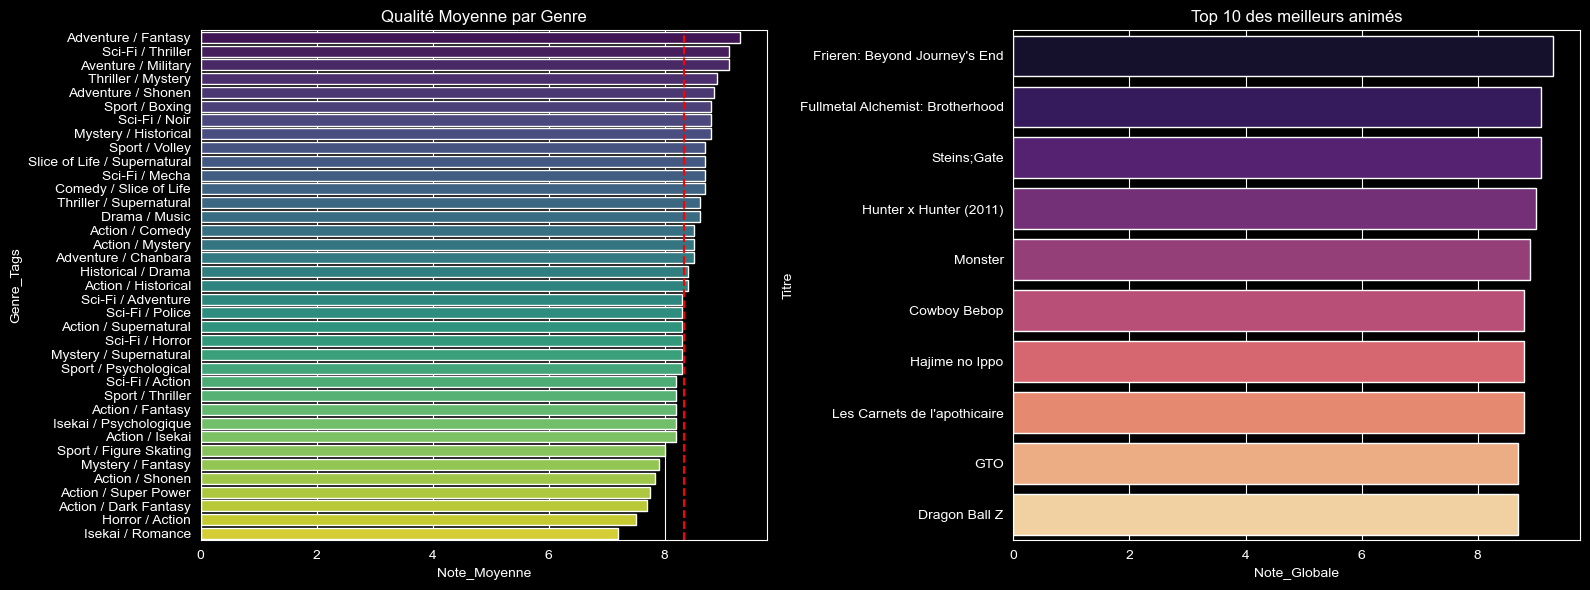

In [41]:
# --- TOUT-EN-UN : ANALYSE & VISUALISATION ---
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. On s'assure que la colonne Titre est bien là
if 'Titre' not in df_clean.columns:
    df_clean = df_clean.rename(columns={' ': 'Titre'})

# 2. Calcul des données par Genre (Macro)
analyse_genre = df_clean.groupby('Genre_Tags').agg(
    Note_Moyenne=('Note_Globale', 'mean')
).sort_values(by='Note_Moyenne', ascending=False)

# 3. Préparation du Top 10 des animés (Micro)
top_10 = df_clean.sort_values(by='Note_Globale', ascending=False).head(10)

# 4. Création des visuels (Côte à côte)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique A : Par Genre
sns.barplot(x=analyse_genre['Note_Moyenne'], y=analyse_genre.index, ax=axes[0], palette='viridis')
axes[0].set_title('Qualité Moyenne par Genre')
axes[0].axvline(df_clean['Note_Globale'].mean(), color='red', linestyle='--')

# Graphique B : Par Animé (Top 10)
sns.barplot(x='Note_Globale', y='Titre', data=top_10, ax=axes[1], palette='magma')
axes[1].set_title('Top 10 des meilleurs animés')

plt.tight_layout()
plt.show()

7.Storytelling

L'objectif de cette étude était de dépasser les chiffres bruts pour comprendre les leviers de satisfaction d'un catalogue de streaming d'animés. Après avoir nettoyé et enrichi une base de données de 47 titres, dont la note moyenne s'établit à 8,12/10, plusieurs conclusions majeures ressortent.


 **1. Le mythe de la quantité vs la réalité de la qualité**

 L'une des premières découvertes de cette analyse concerne la corrélation entre la longueur d'une série et sa note globale.

  -Les statistiques montrent un coefficient de corrélation de $-0,03$ entre le nombre d'épisodes et la note globale.

  -Ce chiffre, proche de zéro, prouve mathématiquement que la quantité ne génère pas la qualité.

  -Une série fleuve n'a pas plus de chances d'être bien notée qu'un format court ; l'excellence est indépendante du volume de contenu produit.


 **2. La stabilité : la signature des chefs-d'œuvre**

  L'indicateur le plus révélateur de cette étude est l'Écart de Stabilité (différence entre la note du meilleur épisode et la note globale).

  -Nous avons observé une corrélation négative forte de $-0,70$ entre la note globale et cet écart.

  -Cela signifie que plus un animé est jugé "excellent", plus il est constant dans sa production.

  -Les meilleurs titres ne reposent pas sur quelques épisodes de génie perdus dans une masse médiocre, mais sur une régularité exemplaire du début à la fin.


 **3. Palmarès et segmentation du catalogue**

  Grâce à la création d'un "Verdict de Qualité", nous avons pu isoler les profils types du catalogue :

  -L'Élite (Performance $> +0,7$) : Des titres comme Fullmetal Alchemist: Brotherhood (9,1) ou Hunter x Hunter (9,0) se distinguent par une performance très largement supérieure à la moyenne et une stabilité quasi-parfaite.

  -Les Valeurs Sûres : Représentant la majorité du catalogue (36 animés sur 47), ces titres assurent une base de satisfaction solide pour les utilisateurs.

  -Les Points de Vigilance : Des séries comme Re:Zero présentent une note en retrait (7,2) combinée à une forte instabilité (1,7), signalant un contenu plus clivant ou irrégulier pour l'audience.


 **4. Synthèse stratégique**

  En conclusion, cette analyse démontre que pour optimiser un catalogue, il est préférable de privilégier la consistance narrative plutôt que le volume d'épisodes. Un catalogue performant se construit sur des "locomotives" stables qui tirent la moyenne vers le haut et garantissent une expérience utilisateur sans déception majeure.